In [2]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Load in csv
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9.018730e+12
2372,North Jaime,2019-02-10 21:03,11.11,2.781340e+12
2373,West Heather,2019-05-07 19:22,44.94,4.256850e+12


# Merge DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [8]:
pyber_data_df.shape

(2375, 6)

In [ ]:
#df=pyber_data_df.copy()

# A ride-sharing summary DataFrame by city type 

In [7]:
#  1. Get the total rides for each city type
number_of_rides = pyber_data_df.groupby('type')['ride_id'].count()
number_of_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
# 2. Get the total drivers for each city type
sum_of_driver_city_type = city_data_df.groupby('type')['driver_count'].sum()
sum_of_driver_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
#  3. Get the total amount of fares for each city type
sum_of_fares_city_type = pyber_data_df.groupby('type')['fare'].sum()
sum_of_fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = sum_of_fares_city_type/number_of_rides
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [13]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = sum_of_fares_city_type/sum_of_driver_city_type
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

# PyBer summary DataFrame

In [16]:
pyber_summary_df=pd.DataFrame({'Total Rides':number_of_rides,'Total Drivers':sum_of_driver_city_type,'Total Fares':sum_of_fares_city_type,'Average Fare Per Ride':average_fare_ride,'Average Fare Per Driver':average_fare_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


# Deliverable 2

In [18]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   float64
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 129.9+ KB


In [21]:
# 1 and #2 Read the merged DataFrame
type_date_df = pd.DataFrame(pyber_data_df.groupby(['type','date'])['fare'].sum())
type_date_df

fare
type  date                   
Rural 2019-01-01 9:45   43.69
      2019-01-02 11:18  52.12
      2019-01-03 19:51  19.90
      2019-01-04 3:31   24.88
      2019-01-06 7:38   47.33
...                       ...
Urban 2019-05-08 1:54   32.69
      2019-05-08 2:31   41.33
      2019-05-08 4:20   21.99
      2019-05-08 4:39   18.45
      2019-05-08 7:29   18.55

[2364 rows x 1 columns]

In [22]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date_df = type_date_df.reset_index()
type_date_df


,type,date,fare
0,Rural,2019-01-01 9:45,43.69
1,Rural,2019-01-02 11:18,52.12
2,Rural,2019-01-03 19:51,19.90
3,Rural,2019-01-04 3:31,24.88
4,Rural,2019-01-06 7:38,47.33
...,...,...,...
2359,Urban,2019-05-08 1:54,32.69
2360,Urban,2019-05-08 2:31,41.33
2361,Urban,2019-05-08 4:20,21.99
2362,Urban,2019-05-08 4:39,18.45


In [23]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_df_pivot = type_date_df.pivot(index='date',values='fare',columns='type')
type_date_df_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
2019-01-01 14:52,NaN,31.15,NaN
2019-01-01 17:22,NaN,NaN,42.11
2019-01-01 21:04,NaN,NaN,11.71
2019-01-01 2:07,NaN,24.07,NaN


In [25]:
# what should it return?
#type_date_df.loc[5:50,:]

In [27]:
# 5
type_date_df_pivot.loc['2019-01-01':'2019-04-29']

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [29]:
new_df_pivot=type_date_df_pivot.loc['2019-01-01':'2019-04-29']
new_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [ ]:
#new_df_pivot.info()

In [30]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_df_pivot.index = pd.to_datetime(new_df_pivot.index)

In [31]:
# 7. Check that the datatype for the index is datetime using df.info()
new_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [32]:
#8
#new_df_pivot.resample('w').sum()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sampled_df_weeks = new_df_pivot.resample('w').sum()
sampled_df_weeks.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')



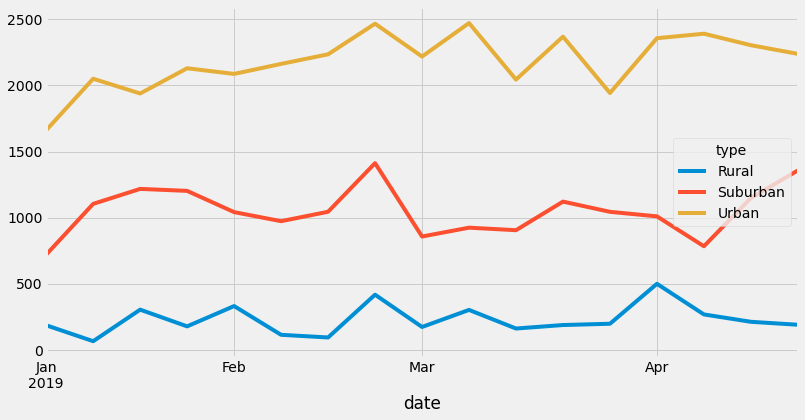

In [45]:
sampled_df_weeks.plot(kind='line',figsize=(12,6));

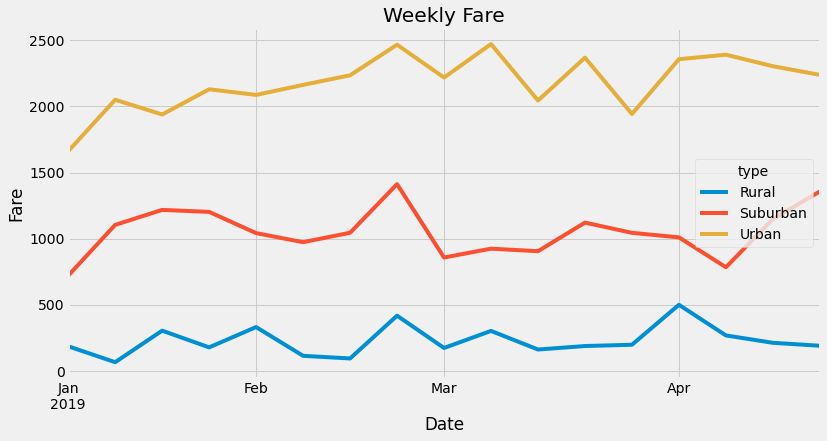

In [47]:
sampled_df_weeks.plot(kind='line',figsize=(12,6))
plt.ylabel('Fare')
plt.xlabel('Date')
plt.title('Weekly Fare')
plt.savefig('PyBer_fare_summary_T.png', transparent=False);